In [ ]:
from keras.models import Model,Sequential
from keras.layers import Dense, Input
from keras.datasets import fashion_mnist
import numpy as np
#import seaborn as sns

Using TensorFlow backend.


In [2]:
from sklearn.cluster import KMeans

In [4]:
(X_train,Y_train),(X_test,Y_test) = fashion_mnist.load_data()
print(X_train.shape)
print(X_test.shape)
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test),np.prod(X_test.shape[1:])))
X_train.shape
X_train = X_train / 255.0
X_test = X_test / 255.0
#input_img = Input(shape=(X_train.shape[1],))

(60000, 28, 28)
(10000, 28, 28)


In [5]:
def get_autoencoder(input_dimension):
  autoencoder = Sequential()
  #Adding encoder layers
  autoencoder.add(Dense(128,input_shape = (input_dimension,),activation='relu'))
  autoencoder.add(Dense(64, activation = 'relu'))
  autoencoder.add(Dense(32, activation = 'relu'))
  #Adding decoder layers
  autoencoder.add(Dense(64,activation = 'relu'))
  autoencoder.add(Dense(128, activation = 'relu'))
  autoencoder.add(Dense(input_dimension, activation = 'sigmoid'))
  return autoencoder
  


In [6]:
autoencoder = get_autoencoder(X_train.shape[1])
autoencoder.summary()
autoencoder.compile(optimizer = 'adam',loss = 'mse')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 784)               101136    
Total params: 222,384
Trainable params: 222,384
Non-trainable params: 0
________________________________________________

In [ ]:
hist = autoencoder.fit(X_train,X_train, epochs = 100, batch_size = 256, shuffle = True, validation_data = (X_test,X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 13s 212us/step - loss: 0.0512 - val_loss: 0.0255
Epoch 2/100
60000/60000 [==============================] - 12s 194us/step - loss: 0.0230 - val_loss: 0.0210
Epoch 3/100
60000/60000 [==============================] - 11s 189us/step - loss: 0.0199 - val_loss: 0.0189
Epoch 4/100
60000/60000 [==============================] - 12s 200us/step - loss: 0.0183 - val_loss: 0.0176
Epoch 5/100
60000/60000 [==============================] - 11s 185us/step - loss: 0.0171 - val_loss: 0.0168
Epoch 6/100
60000/60000 [==============================] - 12s 200us/step - loss: 0.0164 - val_loss: 0.0162
Epoch 7/100
60000/60000 [==============================] - 13s 209us/step - loss: 0.0158 - val_loss: 0.0157
Epoch 8/100
60000/60000 [==============================] - 12s 197us/step - loss: 0.0153 - val_loss: 0.0151
Epoch 9/100
60000/60000 [==============================] - 11s 190us/step - loss: 0.01

In [ ]:

autoencoder.save_weights('train_model_weights.h5')

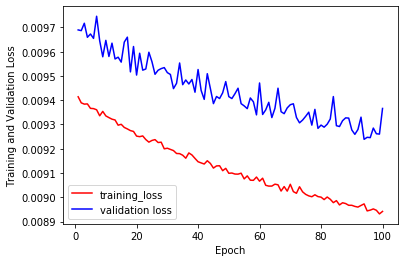

In [13]:
import matplotlib.pyplot as plt
epochlist = []
for i in range(1,101):
    epochlist.append(i)
epochlist = np.array(epochlist)
#hist.history['accuracy'] *= 100
#hist.history['loss'] *= 100
#plt.plot(epochlist,hist.history['accuracy'], label='training_accuracy',color = 'b')
plt.plot(epochlist,hist.history['loss'], label='training_loss', color = 'r')
plt.plot(epochlist, hist.history['val_loss'], label = 'validation loss', color = 'b')
#plt.plot(history.his['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
#plt.ylim([0.5, 1])
plt.legend(loc='lower left')
plt.show()

In [0]:
autoencoder.load_weights('train_model_weights.h5')

In [0]:
input_img = Input(shape=(X_train.shape[1],))
encoder_layer1 = autoencoder.layers[0]
encoder_layer2 = autoencoder.layers[1]
encoder_layer3 = autoencoder.layers[2]
encoder = Model(input_img, encoder_layer3(encoder_layer2(encoder_layer1(input_img))))

In [16]:
encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


In [0]:
encoded_images = encoder.predict(X_train)
autoencoder_images = autoencoder.predict(X_train)

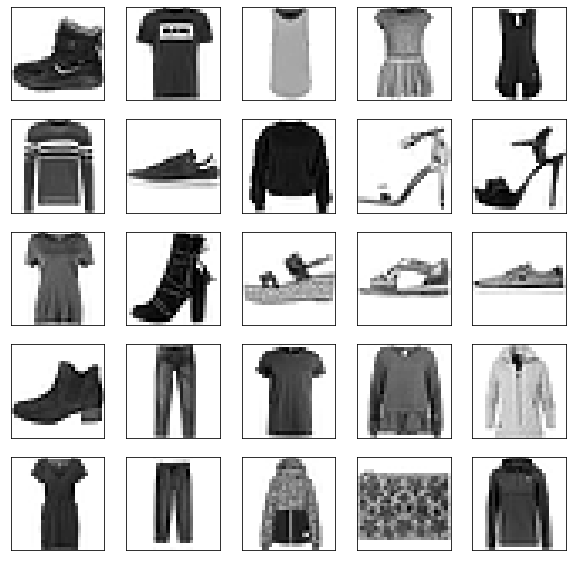

In [18]:
#Drawing the original Images
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  data = X_train[i]
  plt.xticks([])
  plt.yticks([])
  plt.imshow(data.reshape(28,28),cmap=plt.cm.binary)
  
  




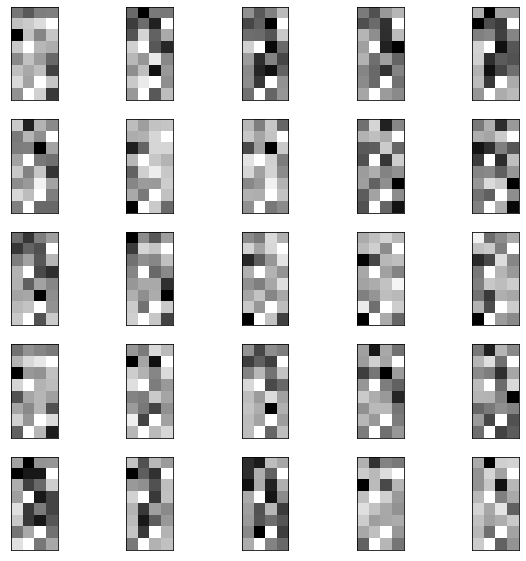

In [19]:
#Plotting the encoded images
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  data = encoded_images[i]
  plt.xticks([])
  plt.yticks([])
  plt.imshow(data.reshape(8,4),cmap=plt.cm.binary)

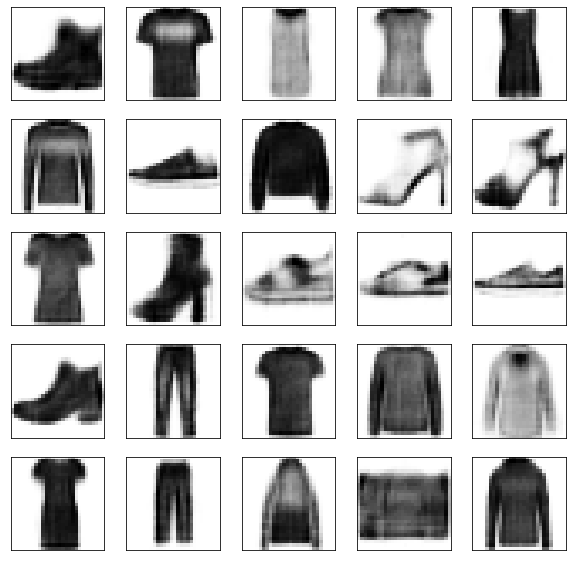

In [20]:
#Plotting the images from the final laeyr autoencoder
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  data = autoencoder_images[i]
  plt.xticks([])
  plt.yticks([])
  plt.imshow(data.reshape(28,28),cmap=plt.cm.binary)

In [0]:
kmeans = KMeans(n_clusters=10,max_iter=300, algorithm='full',random_state=0)

In [0]:
#Gets the cluster IDs of the encoded or latent representation of the imagesn in the mnist dataset
clusters = kmeans.fit_predict(encoded_images)

In [0]:
''' In this code snippet I am using scipy.stats method named mode. 
Mode actually returns  the position or in this case the clusters that have the largest frequency'''
#Source : Python Data Science Handbook 
from scipy.stats import mode
def get_permuted_labels(clusters):
  labels = np.zeros_like(clusters)
  for i in range(10):
    # This will return a numpy array each time containing True and False values, True where the cluster matched
    mask = (clusters == i)
    #print(mask)
    #print(Y_train[mask])
    labels[mask] = mode(Y_train[mask])[0]
  return labels
    

In [37]:
from sklearn.metrics import accuracy_score,confusion matrix
labels_kmeans = get_permuted_labels(clusters)
accuracy_kmeans = accuracy_score(Y_train, labels_kmeans)
print(accuracy_kmeans)

0.5467166666666666


In [38]:
cm_kmeans = confusion_matrix(Y_train, labels_kmeans)
print(cm_kmeans)

[[3768    2    0  319   89    0 1638    3  181    0]
 [ 718 4678    0  293   26    0  279    0    6    0]
 [  66    0    0   30 3316    0 2183    0  404    1]
 [1509  235    0 3512  107    0  622    0   15    0]
 [ 392    3    0  484 3815    0 1095    1  210    0]
 [   0    0    0    0    0    0  527 3594   38 1841]
 [1144    0    0  168 1687    0 2562    2  437    0]
 [   0    0    0    0    0    0   63 5063   21  853]
 [ 321    5    0   50  140    0 1133  428 3914    9]
 [   3    0    0    0    3    0  121  311   71 5491]]


In [0]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = 10,covariance_type = 'full',
                      max_iter = 100).fit_predict(encoded_images)


In [31]:
print(gmm)
labels_gmm = get_permuted_labels(gmm)
accuracy_gmm = accuracy_score(Y_train, labels_gmm)
print(accuracy_gmm)

[6 9 8 ... 8 9 2]
0.61635


In [1]:
from sklearn.metrics import confusion_matrix
cm_gmm = confusion_matrix(Y_train,labels_gmm)
print(cm_gmm)


NameError: name 'Y_train' is not defined